In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np

# Загрузка данных
file_path = r"C:\Users\Ilya\Desktop\AES\code\ldpe_nn\datasets\partly_05-22_18-27.csv"  # <-- ЗАМЕНИ на свой путь!
df = pd.read_csv(file_path)

print("Shape:", df.shape)
display(df.head())


Shape: (500, 21)


,FRPRE_EXP_0,FRPRE_EXP_1,FRPRE_EXP_2,FRPRE_EXP_3,FRPRE_EXP_4,FRPRE_EXP_5,FRPRE_EXP_6,FRPRE_EXP_7,FRPRE_EXP_8,FRPRE_EXP_9,...,E2FD_FLOW,PFR1_TEMP,INIFD1_FLOW1,INIFD1_FLOW2,MWN_LDPE,MWW_LDPE,FSCBN_LDPE,TMAX_PFR1,TEMP_OUT,FLOW_LDPE
0,0.000003,3.790500e-09,250000000,250000000,1250000,1240000,60700000,2500000000,2500000000,1300000000,...,61254.403130,164.853586,6.297436,1.312675,33549.9036,158247.800,25.350852,289.803462,218.909753,9421.18853
1,0.000004,3.790500e-09,250000000,250000000,1250000,1240000,60700000,2500000000,2500000000,1300000000,...,60106.207368,179.116325,7.966517,1.168389,32902.1850,143574.934,25.341436,288.590941,225.015633,9154.35807
2,0.000004,3.790500e-09,250000000,250000000,1250000,1240000,60700000,2500000000,2500000000,1300000000,...,60074.680493,164.590508,4.299670,1.126929,34280.0725,165476.169,25.168953,283.685293,218.602060,9163.52157
3,0.000004,3.790500e-09,250000000,250000000,1250000,1240000,60700000,2500000000,2500000000,1300000000,...,64124.209635,179.272825,6.559423,1.646366,33482.6736,152660.230,25.394727,294.579360,228.418229,9717.07647
4,0.000004,3.790500e-09,250000000,250000000,1250000,1240000,60700000,2500000000,2500000000,1300000000,...,64670.114838,173.475378,6.851846,1.087401,34056.0779,153257.661,25.065681,286.110665,221.480346,9656.11430


In [2]:
# Настрой списки под свою структуру данных
input_cols = [f'FRPRE_EXP_{i}' for i in range(10)]# если у тебя 0-9, а не 1-8!
fixed_cols = ['E2FD_TEMP', 'E2FD_FLOW', 'PFR1_TEMP', 'INIFD1_FLOW1', 'INIFD1_FLOW2']
output_cols = ['MWN_LDPE', 'MWW_LDPE', 'FSCBN_LDPE', 'TMAX_PFR1', 'TEMP_OUT', 'FLOW_LDPE']

all_cols = input_cols + fixed_cols + output_cols
print("Input columns:", input_cols)
print("Output columns:", output_cols)



Input columns: ['FRPRE_EXP_0', 'FRPRE_EXP_1', 'FRPRE_EXP_2', 'FRPRE_EXP_3', 'FRPRE_EXP_4', 'FRPRE_EXP_5', 'FRPRE_EXP_6', 'FRPRE_EXP_7', 'FRPRE_EXP_8', 'FRPRE_EXP_9']
Output columns: ['MWN_LDPE', 'MWW_LDPE', 'FSCBN_LDPE', 'TMAX_PFR1', 'TEMP_OUT', 'FLOW_LDPE']


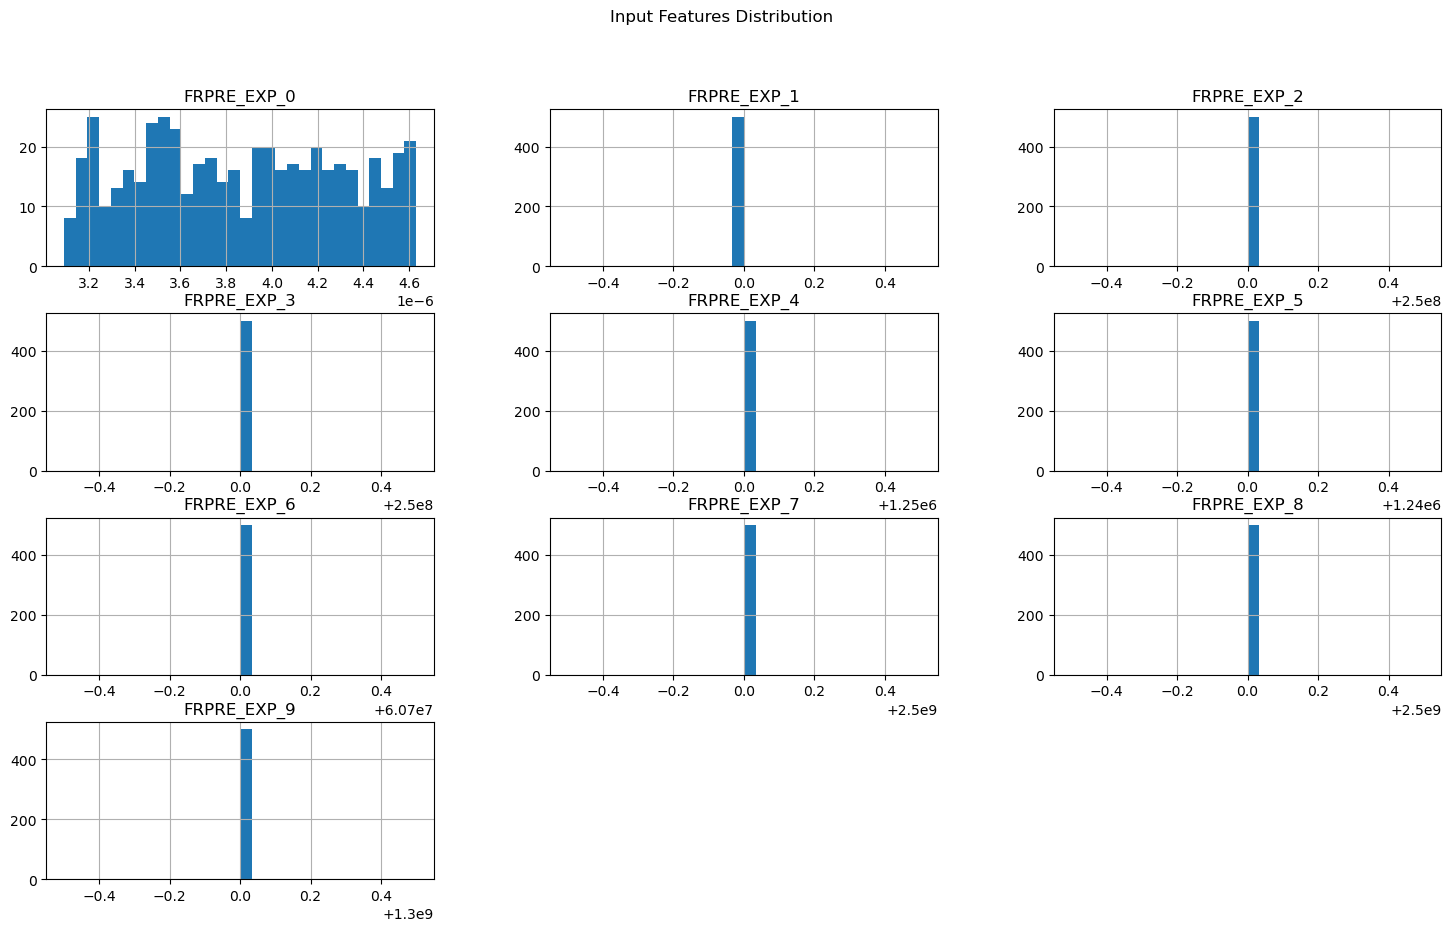

In [3]:
df[input_cols].hist(bins=30, figsize=(18,10))
plt.suptitle('Input Features Distribution')
plt.show()


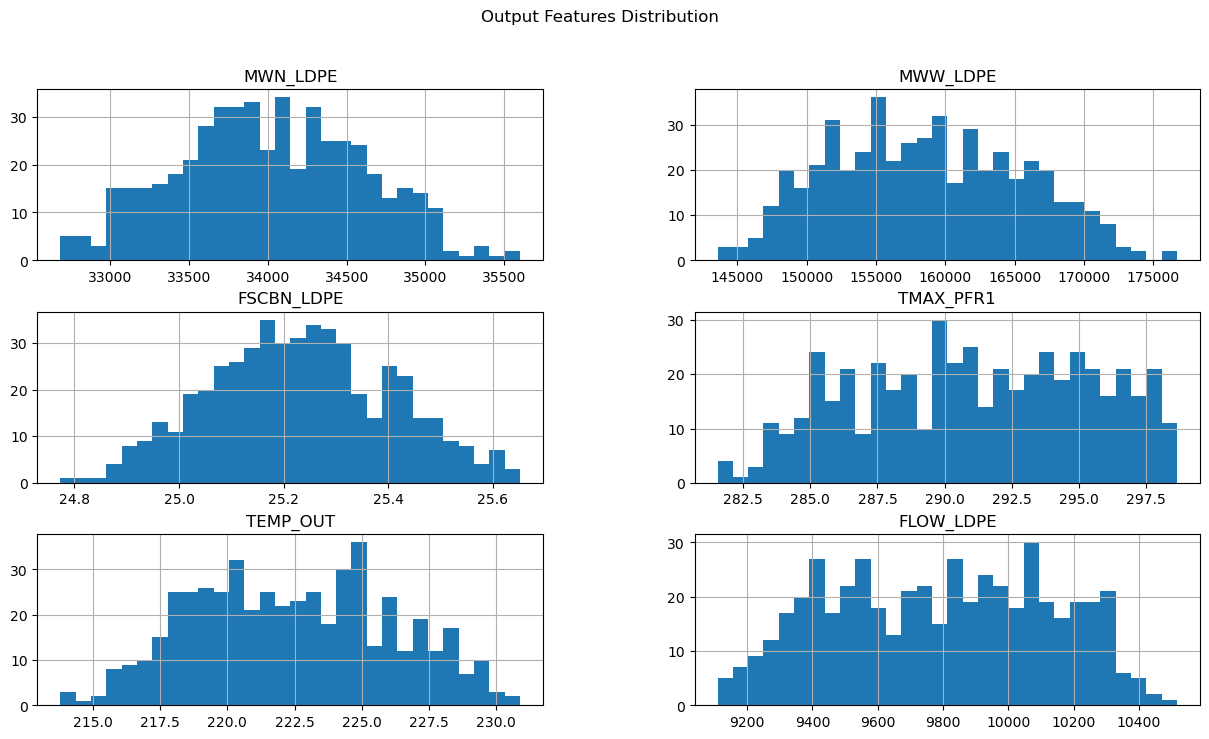

In [4]:
df[output_cols].hist(bins=30, figsize=(15,8))
plt.suptitle('Output Features Distribution')
plt.show()


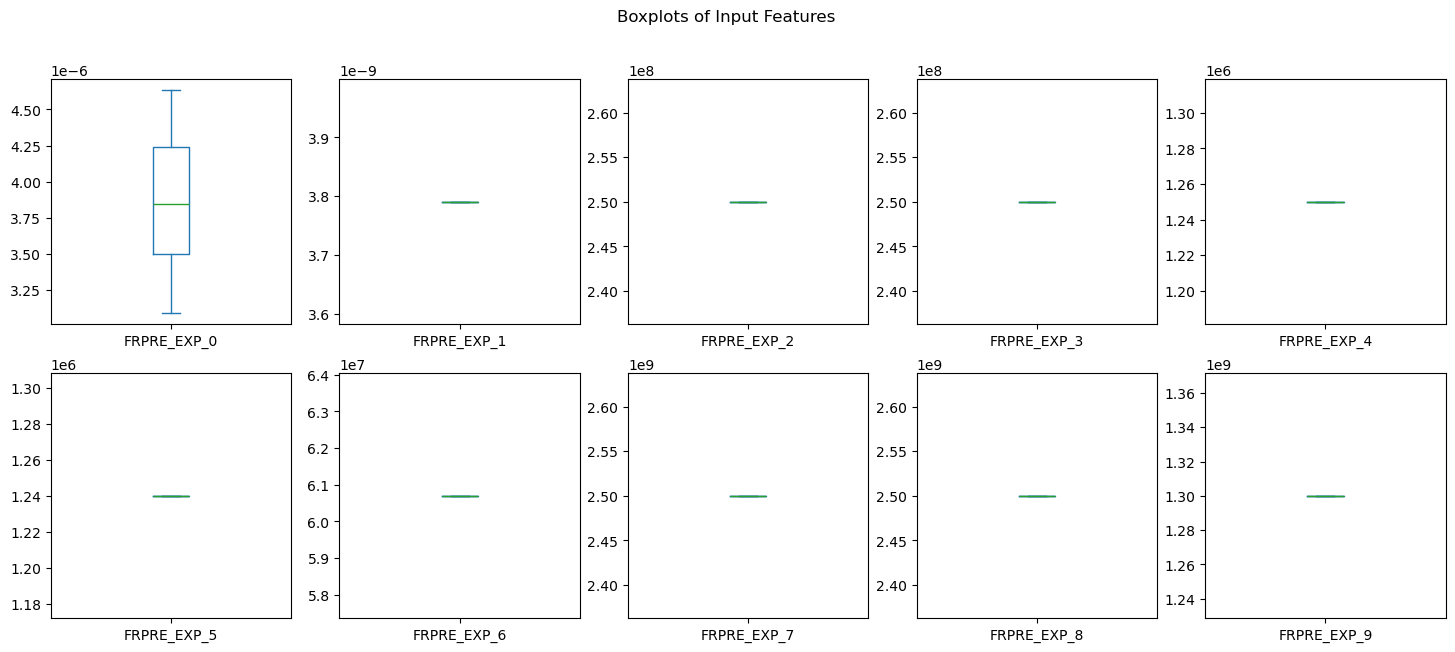

In [5]:
df[input_cols].plot(kind='box', subplots=True, layout=(2,5), figsize=(18,7), sharex=False, sharey=False)
plt.suptitle('Boxplots of Input Features')
plt.show()


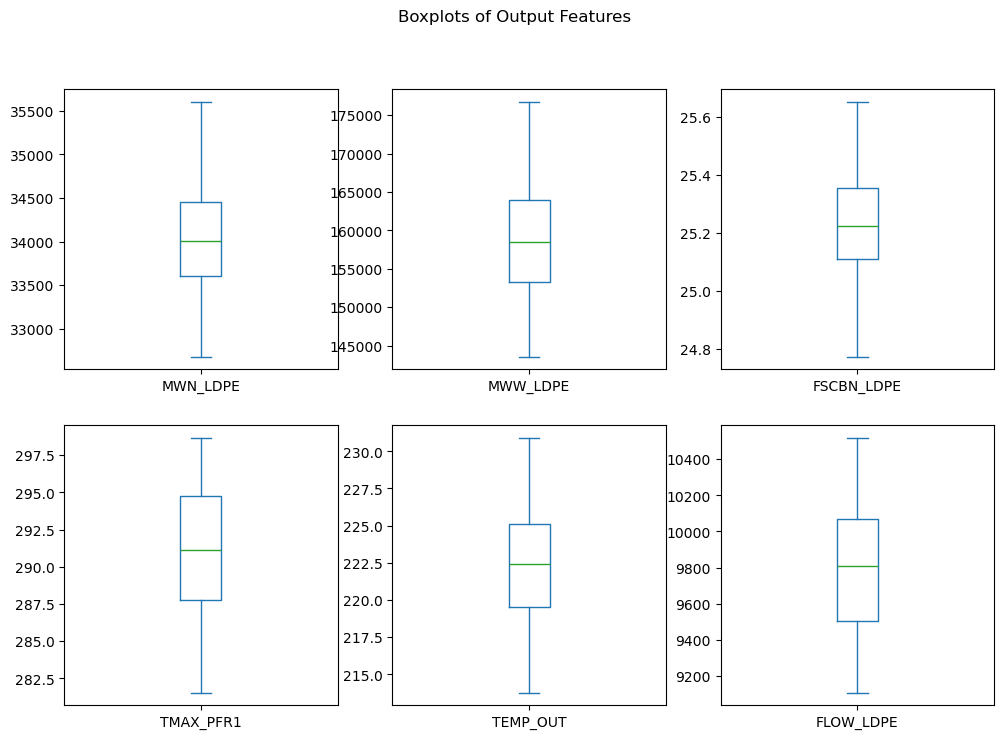

In [6]:
df[output_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), sharex=False, sharey=False)
plt.suptitle('Boxplots of Output Features')
plt.show()


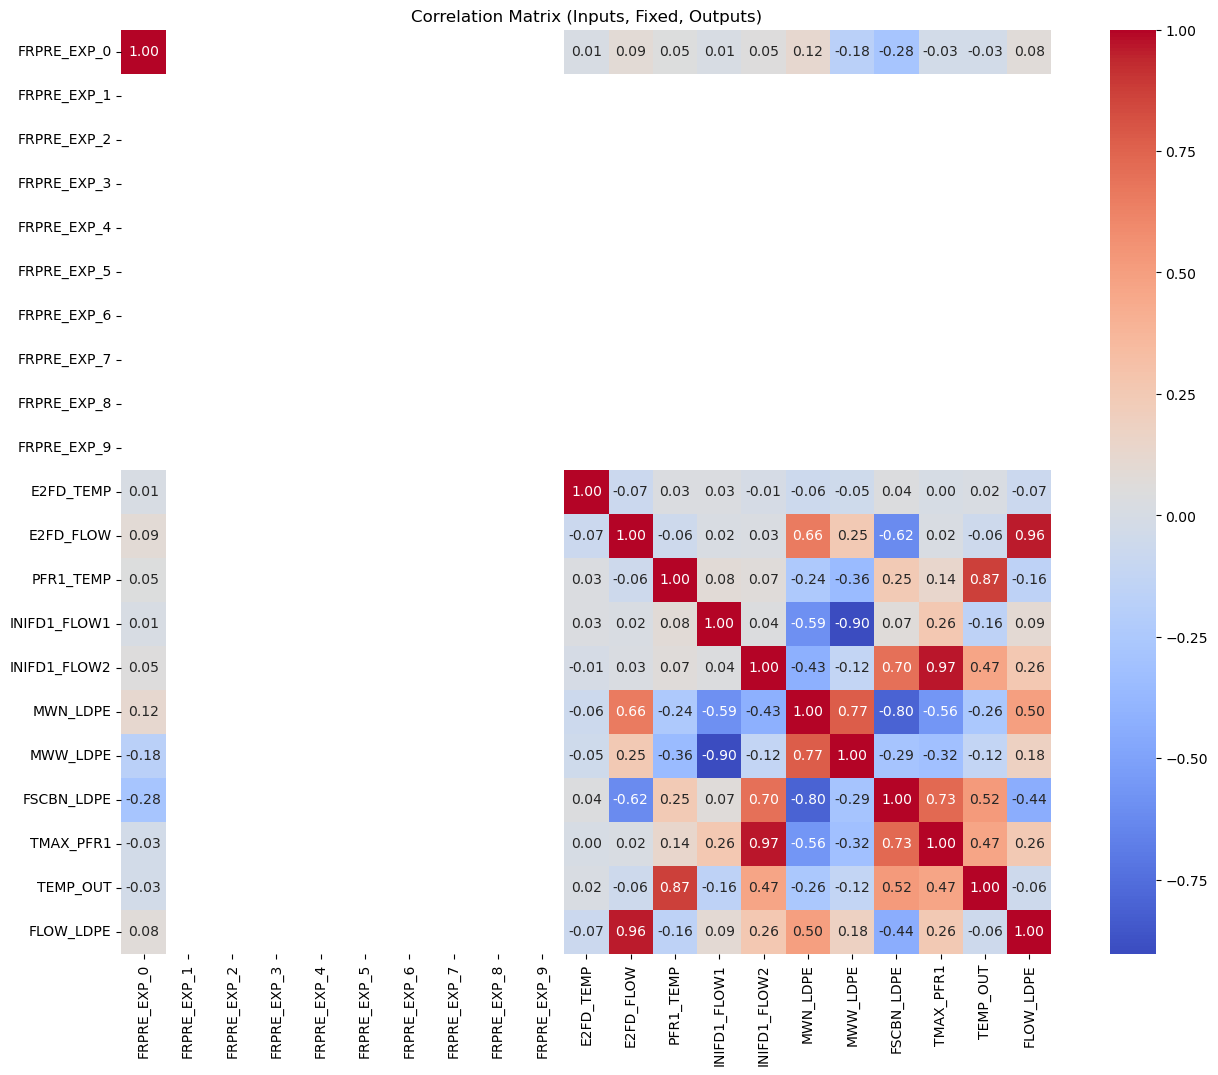

In [7]:
plt.figure(figsize=(15, 12))
corr = df[input_cols + fixed_cols + output_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Inputs, Fixed, Outputs)')
plt.show()


c:\Users\Ilya\.conda\envs\ldpe_nn\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Ilya\.conda\envs\ldpe_nn\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


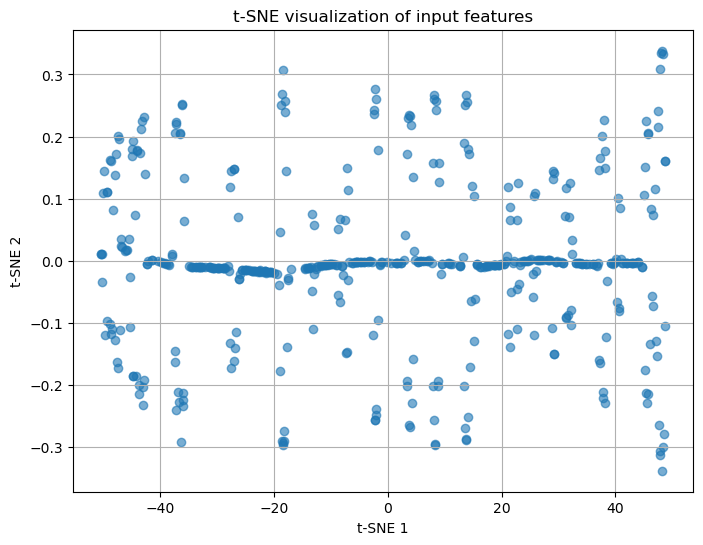

In [8]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(df[input_cols].values)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=0.6)
plt.title("t-SNE visualization of input features")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid()
plt.show()


In [10]:
if 'grade' in df.columns:
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=df['grade'], cmap='tab10', alpha=0.7)
    plt.title("t-SNE of Input Features (colored by grade)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.colorbar(scatter, label='grade')
    plt.grid()
    plt.show()
